In [1]:
import os
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
import requests

In [2]:
org = 'jupyterhub'
url = 'https://api.github.com/orgs/{org}/members'.format(org=org)

# Assumes you've got an environment variable for your token
token = os.environ.get('GITHUB_TOKEN')
params = {}
if token is not None:
    params.update({'access_token': token})
resp_org = requests.get(url, params=params ).json()

## Collect list of members

In [3]:
# Pull the list of usernames and avatar URLs for this org
names = []
for person in resp_org:
    name = person['login']
    avatar = person['avatar_url']
    names.append([name, imread(avatar)])

In [4]:
# Define extra people we'd like to add
usernames = ['freeman-lab', 'andrewosh']
url = 'https://api.github.com/users/{username}'
for user in usernames:
    resp_user = requests.get(url.format(username=user), params={'access_token': token}).json()
    names.append([resp_user['login'], imread(resp_user['avatar_url'])])

In [5]:
# Sort by lower-case first letter
ixs = np.argsort([ii[0].lower() for ii in names])
names = [names[ii] for ii in ixs]

## Make the grid

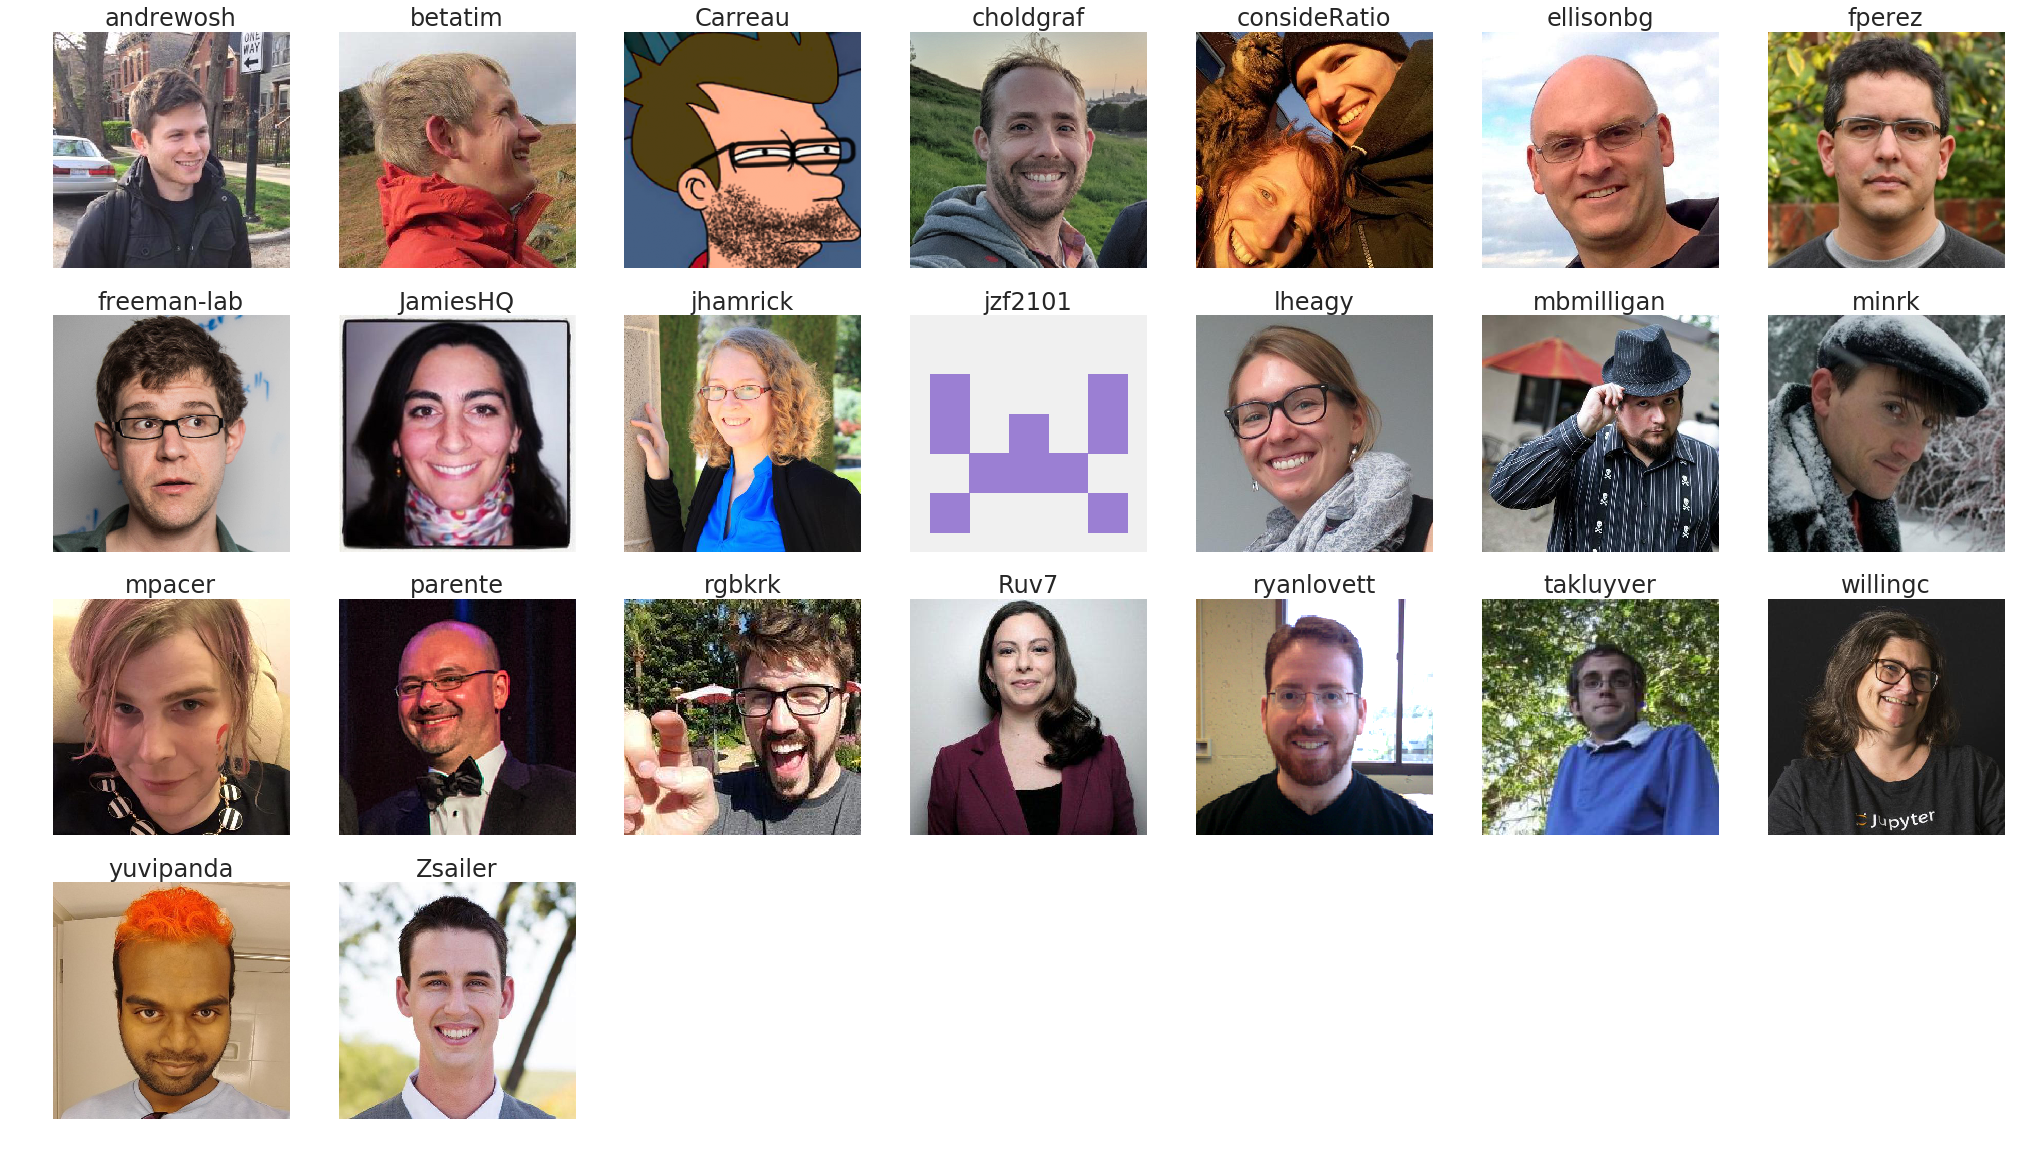

In [6]:
# Rows and columns size
n_cols = 7
n_rows = int(np.ceil(len(names) / n_cols))

# Make the figure
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
for ax in axs.ravel():
    ax.set_axis_off()
for (name, im), ax in zip(names, axs.ravel()):
    ax.imshow(im)
    ax.set(title=name)